# Demo_Projects_CNN_numbers_recognition_Benbhk

In this project, will use the The MNIST database (Modified National Institute of Standards and Technology database), is a large database of handwritten digits.

## Import

In [2]:
# importation of the datasets from tensorflow
from tensorflow.keras import datasets

# conventional imports
import matplotlib.pyplot as plt
import random
import pickle as pkl
import numpy as np

2022-04-19 14:30:50.640062: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-19 14:30:50.640119: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Loading the MNIST database

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

## Display of some exemple

<Figure size 432x288 with 0 Axes>

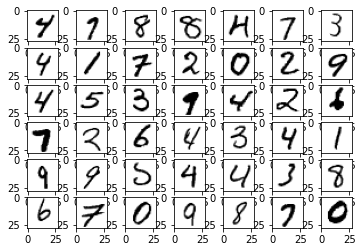

In [4]:
plt.figure()

rows = 6
columns = 7

f, axarr = plt.subplots(rows,columns) 

for i in range(rows):
    for j in range(columns):
        rand = random.randint(0, X_train.shape[0])
        axarr[i,j].imshow(X_train[rand],cmap='gray_r')

## Preprocessing

### Change the image to fit my drowing box

In [4]:
def func(a):
    if a > 100:
        return 255
    return 0

vfunc = np.vectorize(func)

In [ ]:
X_train = vfunc(X_train)
X_test = vfunc(X_test)

### Normalization (0_255 -> -0.5_0.5)

In [5]:
def img_normalizer(X):
    return X/255-0.5
    
X_train_normlz = img_normalizer(X_train)
X_test_normlz = img_normalizer(X_test)

#### Note : this normalisation keep the quality of the image.

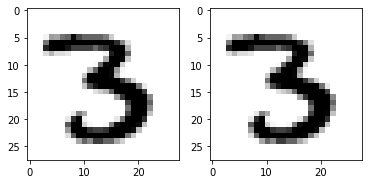

In [9]:
f, axarr = plt.subplots(1,2) 


axarr[0].imshow(X_train[12],cmap='gray_r')
axarr[1].imshow(X_train_normlz[12],cmap='gray_r')

### Inputs the RGB dimensionality in X_train and X_test

In [13]:
from tensorflow.keras.backend import expand_dims

X_train_normlz = expand_dims(X_train_normlz,axis=-1)
X_test_normlz = expand_dims(X_test_normlz,axis=-1)

2022-04-19 14:32:25.333091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-19 14:32:25.333731: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-19 14:32:25.334292: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (BenLaptop-V8N6C5JR): /proc/driver/nvidia/version does not exist
2022-04-19 14:32:25.343238: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-19 14:32:25.353758: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 

In [14]:
X_test_normlz[1].shape

TensorShape([28, 28, 1])

### Categorize the y_train and y_test

In [12]:
y_test[7]

9

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [10]:
y_test_cat[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Model construction

### Building the CNN Architecture

In [30]:
from tensorflow.keras import layers, Sequential, models


def initialize_model():
    
    model = Sequential()
    
    ### First convolution & max-pooling
    model.add(layers.Conv2D(8, (4,4), strides=(1,1), input_shape=(28, 28, 1), activation="relu", padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    ### Second convolution & max-pooling
    model.add(layers.Conv2D(16, (3,3), strides=(1,1), activation="relu", padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One fully connected
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer (let's say a classification with 10 output)
    model.add(layers.Dense(10, activation='softmax')) 
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Training

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=20, restore_best_weights=True)

model = initialize_model()

history = model.fit(X_train_normlz, y_train_cat,  
                    validation_split=0.3,
                    epochs=3, 
                    batch_size=4, 
                    verbose=1, 
                    callbacks=[es])

Epoch 1/3
   26/10500 [..............................] - ETA: 1:07 - loss: 2.2950 - accuracy: 0.0865   

2022-04-19 14:04:30.243528: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24159744 exceeds 10% of free system memory.
2022-04-19 14:04:30.243940: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24159744 exceeds 10% of free system memory.
2022-04-19 14:04:30.245730: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 20873216 exceeds 10% of free system memory.


10500/10500 [==============================] - 139s 13ms/step - loss: 0.3326 - accuracy: 0.8930 - val_loss: 0.1103 - val_accuracy: 0.9655
Epoch 2/3
 3081/10500 [=======>......................] - ETA: 3:38 - loss: 0.0942 - accuracy: 0.9700

KeyboardInterrupt: 

In [65]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,0.3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0.9,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

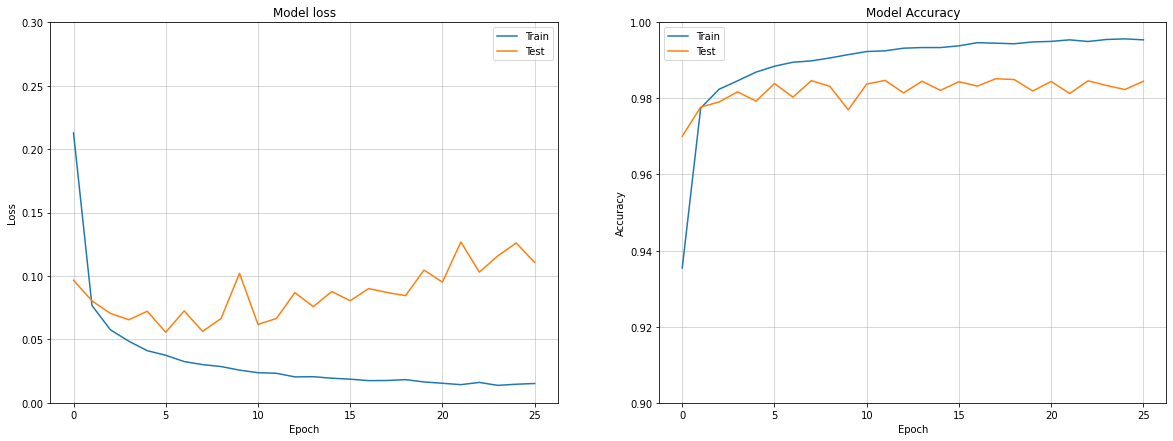

In [66]:
plot_loss_accuracy(history)

### Evalation

In [67]:
model.evaluate(X_test_normlz,y_test_cat)

313/313 [==============================] - 3s 8ms/step - loss: 0.0453 - accuracy: 0.9849


[0.04531124234199524, 0.9848999977111816]

98.5 % accurate on the test set

## Saving the model

In [73]:
pkl.dump(model, open('../Demo_Project_CNN_numbers_recognition_Benbhk/Models/numbers_recognition_model_V1', 'wb'))

INFO:tensorflow:Assets written to: ram://9081d4a6-6f7f-45ae-bdc3-fd77e1c9a7e5/assets


### Load and try

In [11]:
essai_model_load = pkl.load(open('../Demo_Project_CNN_numbers_recognition_Benbhk/Models/numbers_recognition_model_V1', 'rb'))

In [15]:
X_test_normlz[:1,:,:,:]

<tf.Tensor: shape=(1, 28, 28, 1), dtype=float64, numpy=
array([[[[-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ]],

        [[-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
         [-0.5       ],
      

In [27]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [76]:
essai_model_load.evaluate(X_test_normlz,y_test_cat)

313/313 [==============================] - 3s 8ms/step - loss: 0.0453 - accuracy: 0.9849


[0.04531124234199524, 0.9848999977111816]

In [28]:
essai_model_load.predict(X_test_normlz[:1,:,:,:])

array([[1.0247404e-08, 8.6128557e-06, 6.7073010e-08, 3.0577477e-05,
        3.4412622e-08, 2.4382357e-10, 1.3206189e-17, 9.9995291e-01,
        7.0564063e-08, 7.7272907e-06]], dtype=float32)